# Optimalizace výběru položek do omezeného prostoru

**Semestrální úkol předmětu VI1**

**Autor:** Bc. Adéla Leppeltová <br>
**Akademický rok:** 2024/25 <br>

[Odkaz na repozitář na GitHubu](https://github.com/adelaleppeltova/knapsackproblem)



## Obsah
- [Import knihoven](#import-knihoven)
- [Definice datových struktur](#definice-datových-stuktur)
- [Nastavení parametrů](#nastavení-parametrů)
- [Definice funkcí](#definice-funkcí)
- [Algoritmus](#algoritmus)
- [Spuštění algoritmu a výstup](#spuštění-algoritmu-a-výstup)
- [Vizualizace výstupu](#vizualizace-výstupu)
- [Závěr a shrnutí](#závěr-a-shrnutí)


## Popis
Tento projekt se zabývá řešením kombinatorického problému – úlohy o batohu (knapsack problem) – pomocí genetického algoritmu.  

Cílem je nalézt takovou kombinaci položek, která nepřekročí maximální povolenou hmotnost batohu, zároveň maximalizuje celkovou hodnotu a využije dostupný prostor co nejefektivněji.  

Reprezentace jedince: binární vektor (např. [1, 0, 1, 1, 0])  
Fitness funkce: penalizuje přetížení a kombinuje hodnotu a počet položek  
Výběr (selekce): pravděpodobnostní selekce na základě fitness  
Křížení: jednobodové (single-point crossover)  
Mutace: náhodné přepnutí bitu s pravděpodobností parametru MUTATION_RATE  

**Příklady použití:**
- optimalizace tras pro doručování zboží;
- alokace zdrojů - optimalizace přiřazení lidí, strojů, času;
- správa skladu - rozhodování, jaké položky mají být uskladněny tak, aby bylo dosaženo maximálního zisku v omezeném prostoru.


## Import knihoven

In [37]:
from dataclasses import dataclass
import random
import matplotlib.pyplot as plt

## Definice datových struktur

In [38]:
@dataclass
class Item:
    name: str
    weight: float
    value: float

# Seznam položek
items = [
    Item("Notebook", 3.0, 10000),
    Item("Foťák", 1.5, 15000),
    Item("Kniha", 0.5, 300),
    Item("Mobil", 0.3, 8000),
    Item("Sluchátka", 0.4, 1400),
    Item("Lahev s vodou", 1.0, 150),
    Item("Bunda", 0.6, 700),
    Item("Peněženka", 0.2, 200),
    Item("Powerbanka", 0.6, 600),
    Item("Hodinky", 0.2, 1000),
    Item("Svačina", 0.4, 50),
    Item("Lopata", 5.0, 100),
    Item("Sekera", 4.0, 100),
    Item("Stan", 5.0, 2200),

]

## Nastavení parametrů

Nastavení parametrů genetického algoritmu, například maximální hmotnost batohu, velikost populace a pravděpodobnost mutace.

In [39]:
MAX_WEIGHT = 8.0
POPULATION_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.05

## Definice funkcí

Tvorba jedince, populace, vyhodnocení, selekce, křížení a mutace.

In [40]:
def generate_individual(n_items):
    return [random.randint(0, 1) for _ in range(n_items)]

def generate_population(size, n_items):
    return [generate_individual(n_items) for _ in range(size)]

def fitness(individual, items, max_weight):
    total_weight = total_value = 0
    for gene, item in zip(individual, items):
        if gene == 1:
            total_weight += item.weight
            total_value += item.value
    if total_weight > max_weight:
        return 0
    item_count = sum(individual)
    return total_value + item_count * 10

def selection(population, fitnesses):
    return random.choices(population, weights=fitnesses, k=2)

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    return parent1[:point] + parent2[point:]

def mutate(individual, mutation_rate):
    return [gene if random.random() > mutation_rate else 1 - gene for gene in individual]

## Algoritmus

In [41]:
def run_genetic_algorithm():
    best_fitness_history = []
    population = generate_population(POPULATION_SIZE, len(items))


    for gen in range(GENERATIONS):
        fitnesses = [fitness(ind, items, MAX_WEIGHT) for ind in population]
        
        best_fitness = max(fitnesses)
        best_fitness_history.append(best_fitness)

        new_population = []

        for _ in range(POPULATION_SIZE):
            parent1, parent2 = selection(population, fitnesses)
            child = crossover(parent1, parent2)
            child = mutate(child, MUTATION_RATE)
            new_population.append(child)

        population = new_population

    fitnesses = [fitness(ind, items, MAX_WEIGHT) for ind in population]
    best_index = fitnesses.index(max(fitnesses))
    best_solution = population[best_index]
    

# Vypsání výsledků
    print("\nNejlepší nalezené řešení:")
    total_weight = total_value = item_count = 0
    selected_items = []

    for gene, item in zip(best_solution, items):
        if gene == 1:
            selected_items.append(item)
            total_weight += item.weight
            total_value += item.value
            item_count += 1

    for item in selected_items:
        print(f"- {item.name} (hmotnost: {item.weight} kg, hodnota: {item.value} Kč)")

    print(f"\nCelková hmotnost: {total_weight:.2f} kg")
    print(f"Celková hodnota: {total_value:.2f} Kč")
    print(f"Počet položek v batohu: {item_count}")
    print("\nBinární reprezentace řešení:")
    print(" ".join(map(str, best_solution)))

    return best_fitness_history

## Spuštění algoritmu a výstup

In [46]:
best_fitness_history = run_genetic_algorithm()


Nejlepší nalezené řešení:
- Notebook (hmotnost: 3.0 kg, hodnota: 10000 Kč)
- Foťák (hmotnost: 1.5 kg, hodnota: 15000 Kč)
- Kniha (hmotnost: 0.5 kg, hodnota: 300 Kč)
- Mobil (hmotnost: 0.3 kg, hodnota: 8000 Kč)
- Sluchátka (hmotnost: 0.4 kg, hodnota: 1400 Kč)
- Peněženka (hmotnost: 0.2 kg, hodnota: 200 Kč)
- Powerbanka (hmotnost: 0.6 kg, hodnota: 600 Kč)
- Hodinky (hmotnost: 0.2 kg, hodnota: 1000 Kč)
- Svačina (hmotnost: 0.4 kg, hodnota: 50 Kč)

Celková hmotnost: 7.10 kg
Celková hodnota: 36550.00 Kč
Počet položek v batohu: 9

Binární reprezentace řešení:
1 1 1 1 1 0 0 1 1 1 1 0 0 0


## Vizualizace výstupu

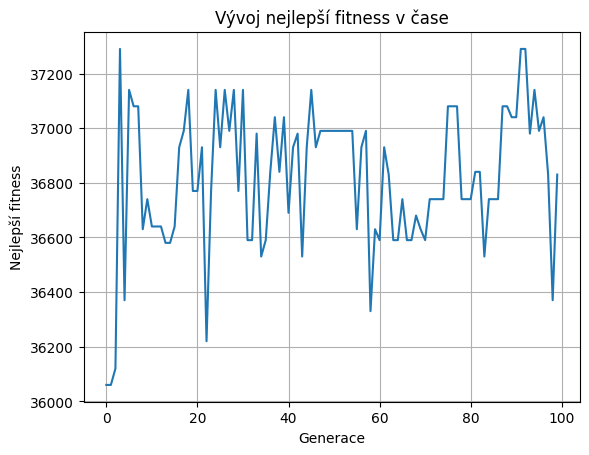

In [47]:
plt.plot(best_fitness_history)
plt.xlabel("Generace")
plt.ylabel("Nejlepší fitness")
plt.title("Vývoj nejlepší fitness v čase")
plt.grid(True)
plt.show()

## Závěr a shrnutí

Tento projekt ukazuje, že genetický algoritmus je efektivní nástroj pro přibližné řešení batohového problému. Výsledky ukazují dobrou kvalitu řešení i pro malé populace.

**Možné rozšíření:**
- více batohů (multi-knapsack),
- Fractional Knapsack Problem: Items can be taken in fractions, allowing for more flexibility in filling the knapsack. 
- Unbounded Knapsack Problem: Items can be included multiple times. 
